In [19]:
# Import libraries and packages
import openml
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)


In [2]:
# load dataset directly from openML 
dataset_id = 44989
dataset = openml.datasets.get_dataset(dataset_id)
house, *_ = dataset.get_data()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [3]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

In [4]:
# Display the first 10 rows of the data
house.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014,10,13
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014,12,9
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015,2,25
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014,12,9
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015,2,18


In [10]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [20]:
# Split the inputs and outputs into separate arrays
# Assuming 'house' is your DataFrame
x = house[['sqft_living']]
y = house[['price']]

# # Convert 1-D arrays into 2-D because the commands later will require it
# x = np.expand_dims(x, axis=1)
# y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (21613, 1)
the shape of the targets y is: (21613, 1)


In [22]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (12967, 1)
the shape of the training set (target) is: (12967, 1)

the shape of the cross validation set (input) is: (4323, 1)
the shape of the cross validation set (target) is: (4323, 1)

the shape of the test set (input) is: (4323, 1)
the shape of the test set (target) is: (4323, 1)


In [23]:
linear_model = LinearRegression()

# Fit the linear model
linear_model.fit(x_train, y_train)

LinearRegression()

In [25]:
b = linear_model.intercept_
w = linear_model.coef_

# Print coefficients and intercept
print(f"w = {w[0, 0]}, b = {b[0]:.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = 274.5545247027872, b = -32191.69
'manual' prediction: f_wb = wx+b : [[297273.74]]


In [28]:
def predict_house_price(sqft_living, model):
    # Preprocess the input if needed (scaling, formatting, etc.)
    # Here, assuming sqft_living is the only feature and it needs no further preprocessing
    
    # Make the prediction
    input_data = np.array([[sqft_living]])
    prediction = model.predict(input_data)
    
    # Return the prediction
    return prediction[0]

# Example usage:
sqft_input = 2000
predicted_price = predict_house_price(sqft_input, linear_model)

print(f"Prediction for a {sqft_input} sqft house: ${predicted_price[0]:0.2f}")



Prediction for a 2000 sqft house: $516917.36


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# Assuming 'house' is your DataFrame
X_train = house[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
y_train = house['price']


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [32]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [ 2.45e+02  1.11e+05 -8.05e+01  2.28e+01 -3.55e+04], b = -646863.75


In [47]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:1000]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:1000]}")
print(f"Target values \n {y_train[:1000]}")

x_house = np.array([3000,10,3000,1900,3]).reshape(-1,5)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 7 grade, 1700sqft above and 3 bathrooms = ${x_house_predict:0.2f}")

Prediction on training set:
 [ 320050.24  545162.35  172893.23  451469.84  488576.45 1540541.35
  384453.49  289600.12  487806.58  407919.96  927104.57  340668.72
  371325.12  325474.69  388952.39  859435.21  414241.93  395484.84
  316959.34  330226.56  428561.68  909629.25  578197.6   281436.84
  615839.31  253903.22  679869.75  479227.56  412391.94  636578.28
  594203.24  305108.6   551864.63  421479.53  481427.71  631895.52
  254636.04  599135.62  352066.62  644596.89  743951.99 1042953.67
  930502.73  389852.16  254493.42  743475.04  175131.6   702562.09
  296554.32  826252.51  318276.59  839168.24  365983.66  508275.78
  722406.88  774968.93  464102.16  613207.07  729667.47  491877.02
  619873.32  305506.11  651797.94  469330.98  401438.14  603003.35
  886106.95  461791.02  282831.1   895472.81 1463276.57  304627.14
  587657.71  600448.2   464094.6  1044901.49  467700.53  286690.14
  393435.67 1020202.39  593902.7   397702.88  548557.76  507449.47
  177987.99  717540.75  525530.72

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



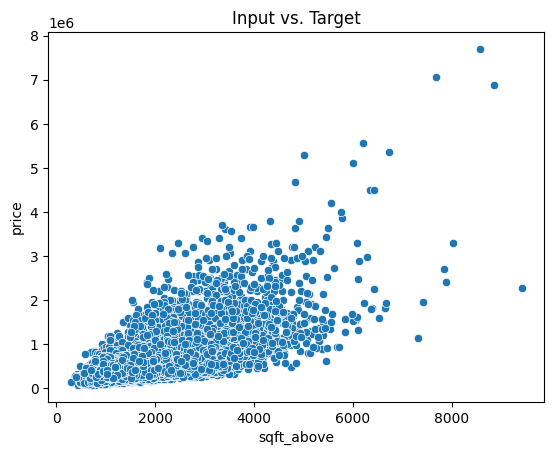

In [44]:

# Create a seaborn scatter plot using DataFrame
sns.scatterplot(data=house, x='sqft_above', y='price')
plt.title("Input vs. Target")
plt.xlabel("sqft_above")
plt.ylabel("price")

# Convert seaborn plot to plotly
fig = px.scatter(house, x='sqft_above', y='price', title="Input vs. Target")

# Show the plotly interactive plot
fig.show()

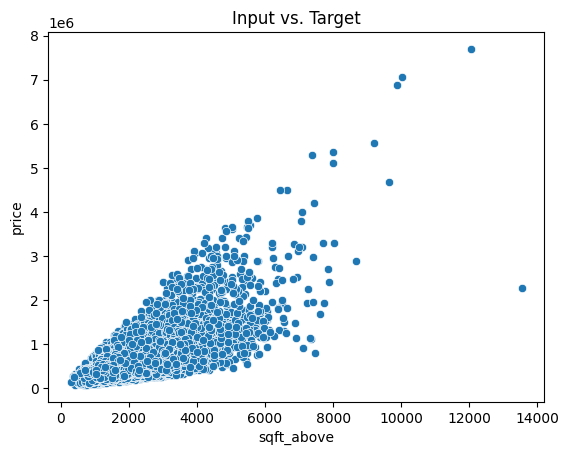

In [45]:
# Create a seaborn scatter plot using DataFrame
sns.scatterplot(data=house, x='sqft_living', y='price')
plt.title("Input vs. Target")
plt.xlabel("sqft_above")
plt.ylabel("price")

# Convert seaborn plot to plotly
fig = px.scatter(house, x='sqft_above', y='price', title="Input vs. Target")

# Show the plotly interactive plot
fig.show()